# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 6 

## Работаа с пропущенными значениями. Выбросы.

*Автор: Татьяна Рогович*

In [1]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')

**Квартили**

Квартиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квартиль называется процентилем или перцентилем.

Например, фраза «для развитых стран 99-процентиль продолжительности жизни составляет 100 лет» означает, что ожидается, что 99 % людей проживут не более, чем 100 лет.

Относительно нашего датасета фраза "75%-перцентиль возраста пассажиров Титаника равна 38 лет" означает, что 75% пассажиров были не старше 38 лет.


In [11]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Квартили используем для рассчета межквартильного размаха, который помогает с поиском выбросов в данных:

In [12]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr)

20.125 38.0 17.875


In [13]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-6.6875
64.8125


In [14]:
for i in data.index:
    if data.iloc[i]['Age'] > iqr_outlier_threshold_up:
        print(data.iloc[i]['Age'], data.iloc[i]['Sex'])

66.0 male
65.0 male
71.0 male
70.5 male
65.0 male
65.0 male
71.0 male
80.0 male
70.0 male
70.0 male
74.0 male


<AxesSubplot:xlabel='Age', ylabel='Sex'>

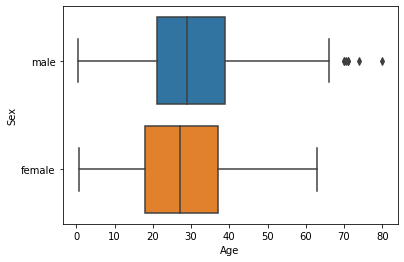

In [15]:
import seaborn as sns # сегодня впервые видим эту библиотеку, но позже рассмотрим ее подробнее
sns.boxplot(x=data['Age'], y=data['Sex'])

Если вы помните, то переменная Age содержит пропущенные значения. Давайте посмотрим информацию об этой колонке.


In [2]:
data[['Age']].info()  # обратите внимание - двойные скобки. Так pandas нам вернет датафрейм из одной колонки, 
                      # а не список.
                      # А метод info() работает только с датафреймом


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [3]:
type(data['Age'])  # вот так - объект подобный списку (Series)

pandas.core.series.Series

In [4]:
type(data[['Age']])  # а вот так - датафрейм

pandas.core.frame.DataFrame

Вернемся к info(). Мы видим, что из 891 наблюдения у нас только 714 ненулевых значений. Значит, у этих пассажиров возраст неизвестен. Ваши идеи, что можно с этим сделать?

Есть разные варианты того, что делать с пропущенными значениями - от "не делать ничего и выкинуть их" до "давайте предскажем их значения с помощью нейронки". Почитать можно здесь: 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Мы с вами попробуем сделать второй по сложности вариант (после не делать ничего) и заменить их средним значением (средним или медианой). Для категориальных данных можно заполнять пропущенные значения модой.

Пропущенные значения могут быть закодированы по-разному - 0, 'No response', '999'. В итоге мы их всегда хотим привести к объекту NaN (not a number), с которым могут работать методы pandas. 


In [5]:
print(data.loc[5, 'Age'])
print(type(data.loc[5, 'Age']))

nan
<class 'numpy.float64'>


In [6]:
data[data['Age'].isnull()].head() # выводим значения датафрейма, в которых отсутствует возраст
                                  # Они возращают True методу .isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [7]:
data['Age'].median() # вспомним какая у нас медиана

28.0

In [8]:
data['Age_Median'] = data['Age'].fillna(data['Age'].median())  # сохраняю результат заполнения в новую колонку

In [9]:
data[data['Age'].isnull()].head()  # смотрим, что произошло с возрастом в новой колонке у тех, у кого он отсутсвовал

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0


In [10]:
data.head() # А у всех остальных - их нормальный возраст.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


Такой метод один из самых топорных, но сойдет для первого знакомства или черновика анализа в серьезном исследовании. Давайте попробуем теперь немного улучшить его. Посмотрим, как отличается медианный возраст для мужчин и женщин.

In [11]:
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Разница два года! Было бы логично в наших данных заполнять недостающие значения по полу.

In [12]:
data["Age_Median_Sex"] = data["Age"].fillna(data.groupby('Sex')["Age"].transform('median'))

In [13]:
data[data['Age'].isnull()].head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,29.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0,27.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0,29.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0,27.0


In [14]:
data.head() # Опять проверяем, что это все применилось только к нужным людям

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


Разберем как работает предыдущий кусок кода

In [15]:
# эта функция возвращает нам колонку возраст, где все значения заменены медианой по условию пола
# data.groupby('Sex') - группирует наши значения по полу
# ['Age'] - колонка, с которой работаем
# transform('median') - высчитывает медианный возраст для каждого пола и подставляет ее вместо значения
data.groupby('Sex')['Age'].transform('median').head()

0    29.0
1    27.0
2    27.0
3    27.0
4    29.0
Name: Age, dtype: float64

In [16]:
# когда передаем это все как аргумент методу .fillna - 
# заполнение по медиане работает только для отсутвтующих значений.
data["Age"].fillna(data.groupby('Sex')["Age"].transform('median')).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

**Заполнение по моде для категориальных переменных**

Тоже самое (почти!) работает и для категориальных переменных.

In [17]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0


Давайте посмотрим, что возвращает нам функция мода - не число, как например median или mean, а список. 

In [18]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Чтобы передать ее результат методу fillna, нам нужно "вытащить" значение из него (а это мы умеем делать - оно лежит под нулевым индексом.


In [19]:
data['Embarked'].mode()[0]

'S'

In [20]:
# применяем
data["Embarked_Mode"] = data["Embarked"].fillna(data['Embarked'].mode()[0])

In [21]:
# проверяем
data.loc[61]

PassengerId                        62
Survived                            1
Pclass                              1
Name              Icard, Miss. Amelie
Sex                            female
Age                              38.0
SibSp                               0
Parch                               0
Ticket                         113572
Fare                             80.0
Cabin                             B28
Embarked                          NaN
Age_Median                       38.0
Age_Median_Sex                   38.0
Embarked_Mode                       S
Name: 61, dtype: object